In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud_data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
fraud_data.shape

(600, 6)

In [6]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


Creating dummy vairables for Undergrad, Marital.Status, Urban dropping first dummy variable:-

In [7]:
fraud_data=pd.get_dummies(fraud_data,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [8]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good

fraud_data["TaxInc"] = pd.cut(fraud_data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [9]:
print(fraud_data)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”.

In [10]:
#After creation of new col. TaxInc also made its dummies var concating right side of df

fraud_data = pd.get_dummies(fraud_data,columns = ["TaxInc"],drop_first=True)

In [11]:
fraud_data.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


Plotting the pair plot to visualize the attributes:-

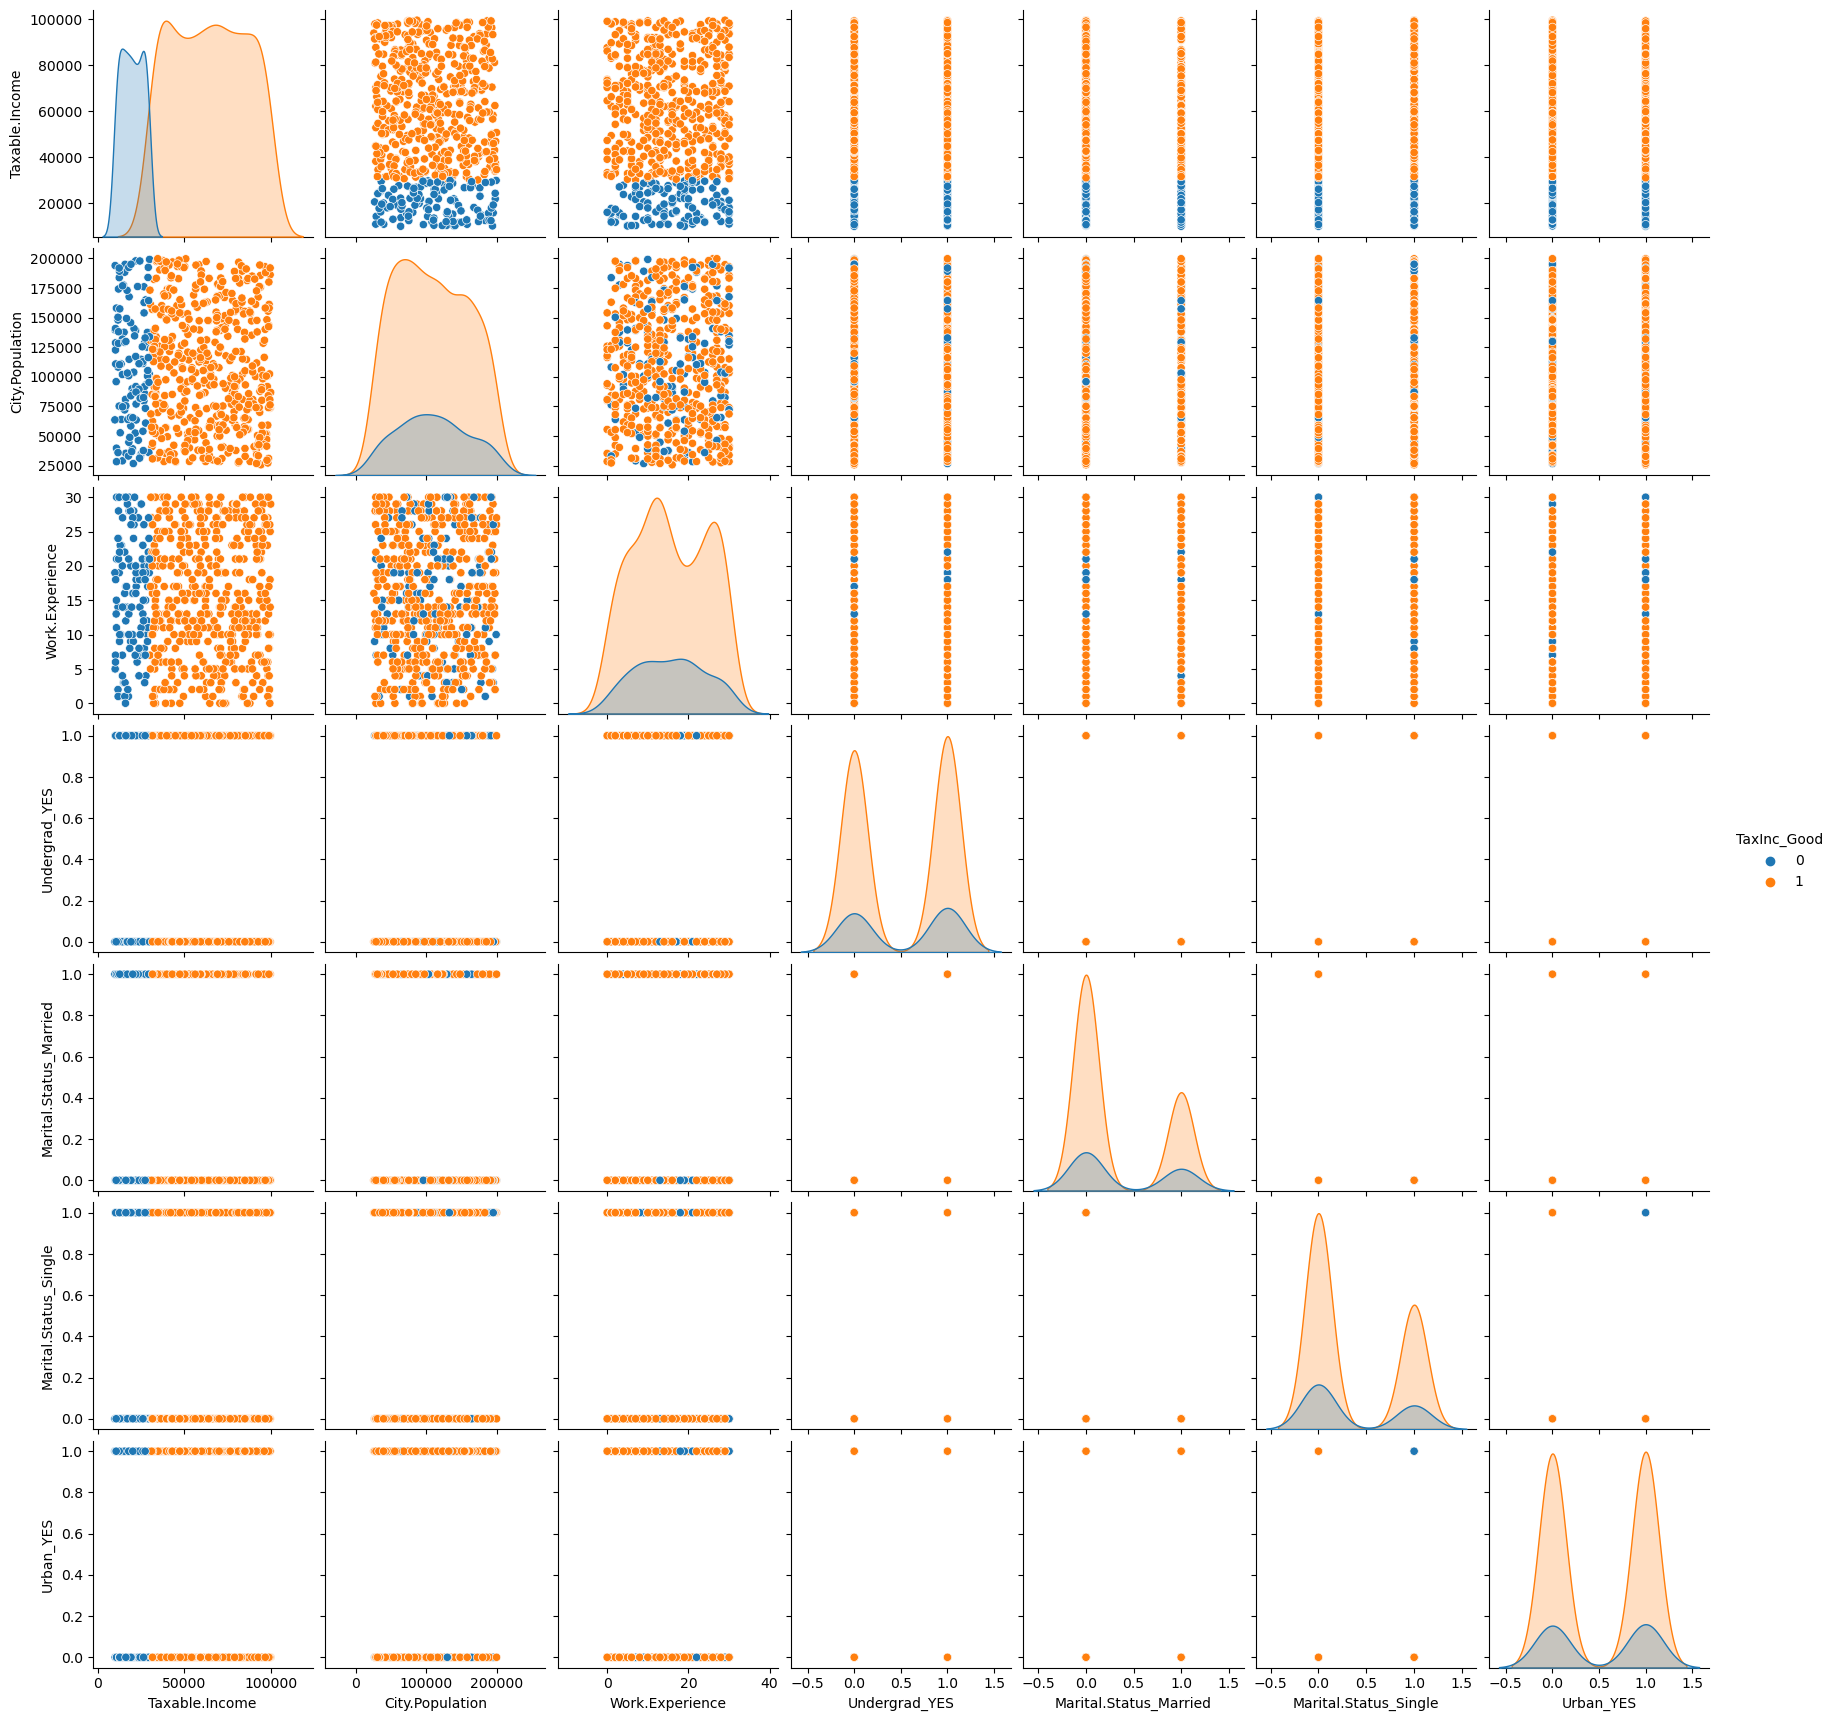

In [12]:
sns.pairplot(data=fraud_data, hue = 'TaxInc_Good')
plt.show()

Normalization Function:-

In [13]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
fraud_data_norm = norm_func(fraud_data.iloc[:,1:])       #Normalized data frame (considering the numerical part of data)
fraud_data_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


Declaring the features and targets:-

In [15]:
X = fraud_data_norm.drop(['TaxInc_Good'], axis=1)
y = fraud_data_norm['TaxInc_Good']

Splitting the data into train and test:-

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
#Converting the Taxable income variable to bucketing. 

fraud_data_norm["income"]="<=30000"
fraud_data_norm.loc[fraud_data["Taxable.Income"]>=30000,"income"]="Good"
fraud_data_norm.loc[fraud_data["Taxable.Income"]<=30000,"income"]="Risky"

In [18]:
fraud_data.drop(["Taxable.Income"],axis=1,inplace=True)        ##Droping the Taxable income variable

In [19]:
fraud_data.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

model.fit doesnt not consider String. So, we encode

In [20]:
le=preprocessing.LabelEncoder()
for column_name in fraud_data.columns:
    if fraud_data[column_name].dtype == object:
        fraud_data[column_name] = le.fit_transform(fraud_data[column_name])
    else:
        pass

Splitting the data into featurea and labels:-

In [21]:
features = fraud_data.iloc[:,0:5]
labels = fraud_data.iloc[:,5]

Combining the column names:-

In [22]:
colnames = list(fraud_data.columns)
predictors = colnames[0:5]
target = colnames[5]

Splitting the data into train and test:-

In [23]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

Model Building:-

In [24]:
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [25]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

2

In [26]:
model.n_outputs_

1

In [27]:
model.oob_score_

0.5354166666666667

In [28]:
prediction = model.predict(x_train)       #Predictions on train data.

For Accuracy Score:-

In [29]:
accuracy = accuracy_score(y_train,prediction)

In [30]:
np.mean(prediction == y_train)

0.9895833333333334

Creating a Cofusion Matrix:-

In [31]:
confusion = confusion_matrix(y_train,prediction)

In [32]:
pred_test = model.predict(x_test)      #Predictions on test data.

For Accuracy Score:-

In [34]:
acc_test =accuracy_score(y_test,pred_test)

In [37]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [38]:
tree = model.estimators_[5]

In [39]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)

In [40]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Building Decision Tree Classifier using Entropy Criteria:-

In [61]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Plotting the decision tree:-

In [68]:
colnames = list(fraud_data.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

<Figure size 2000x1500 with 0 Axes>

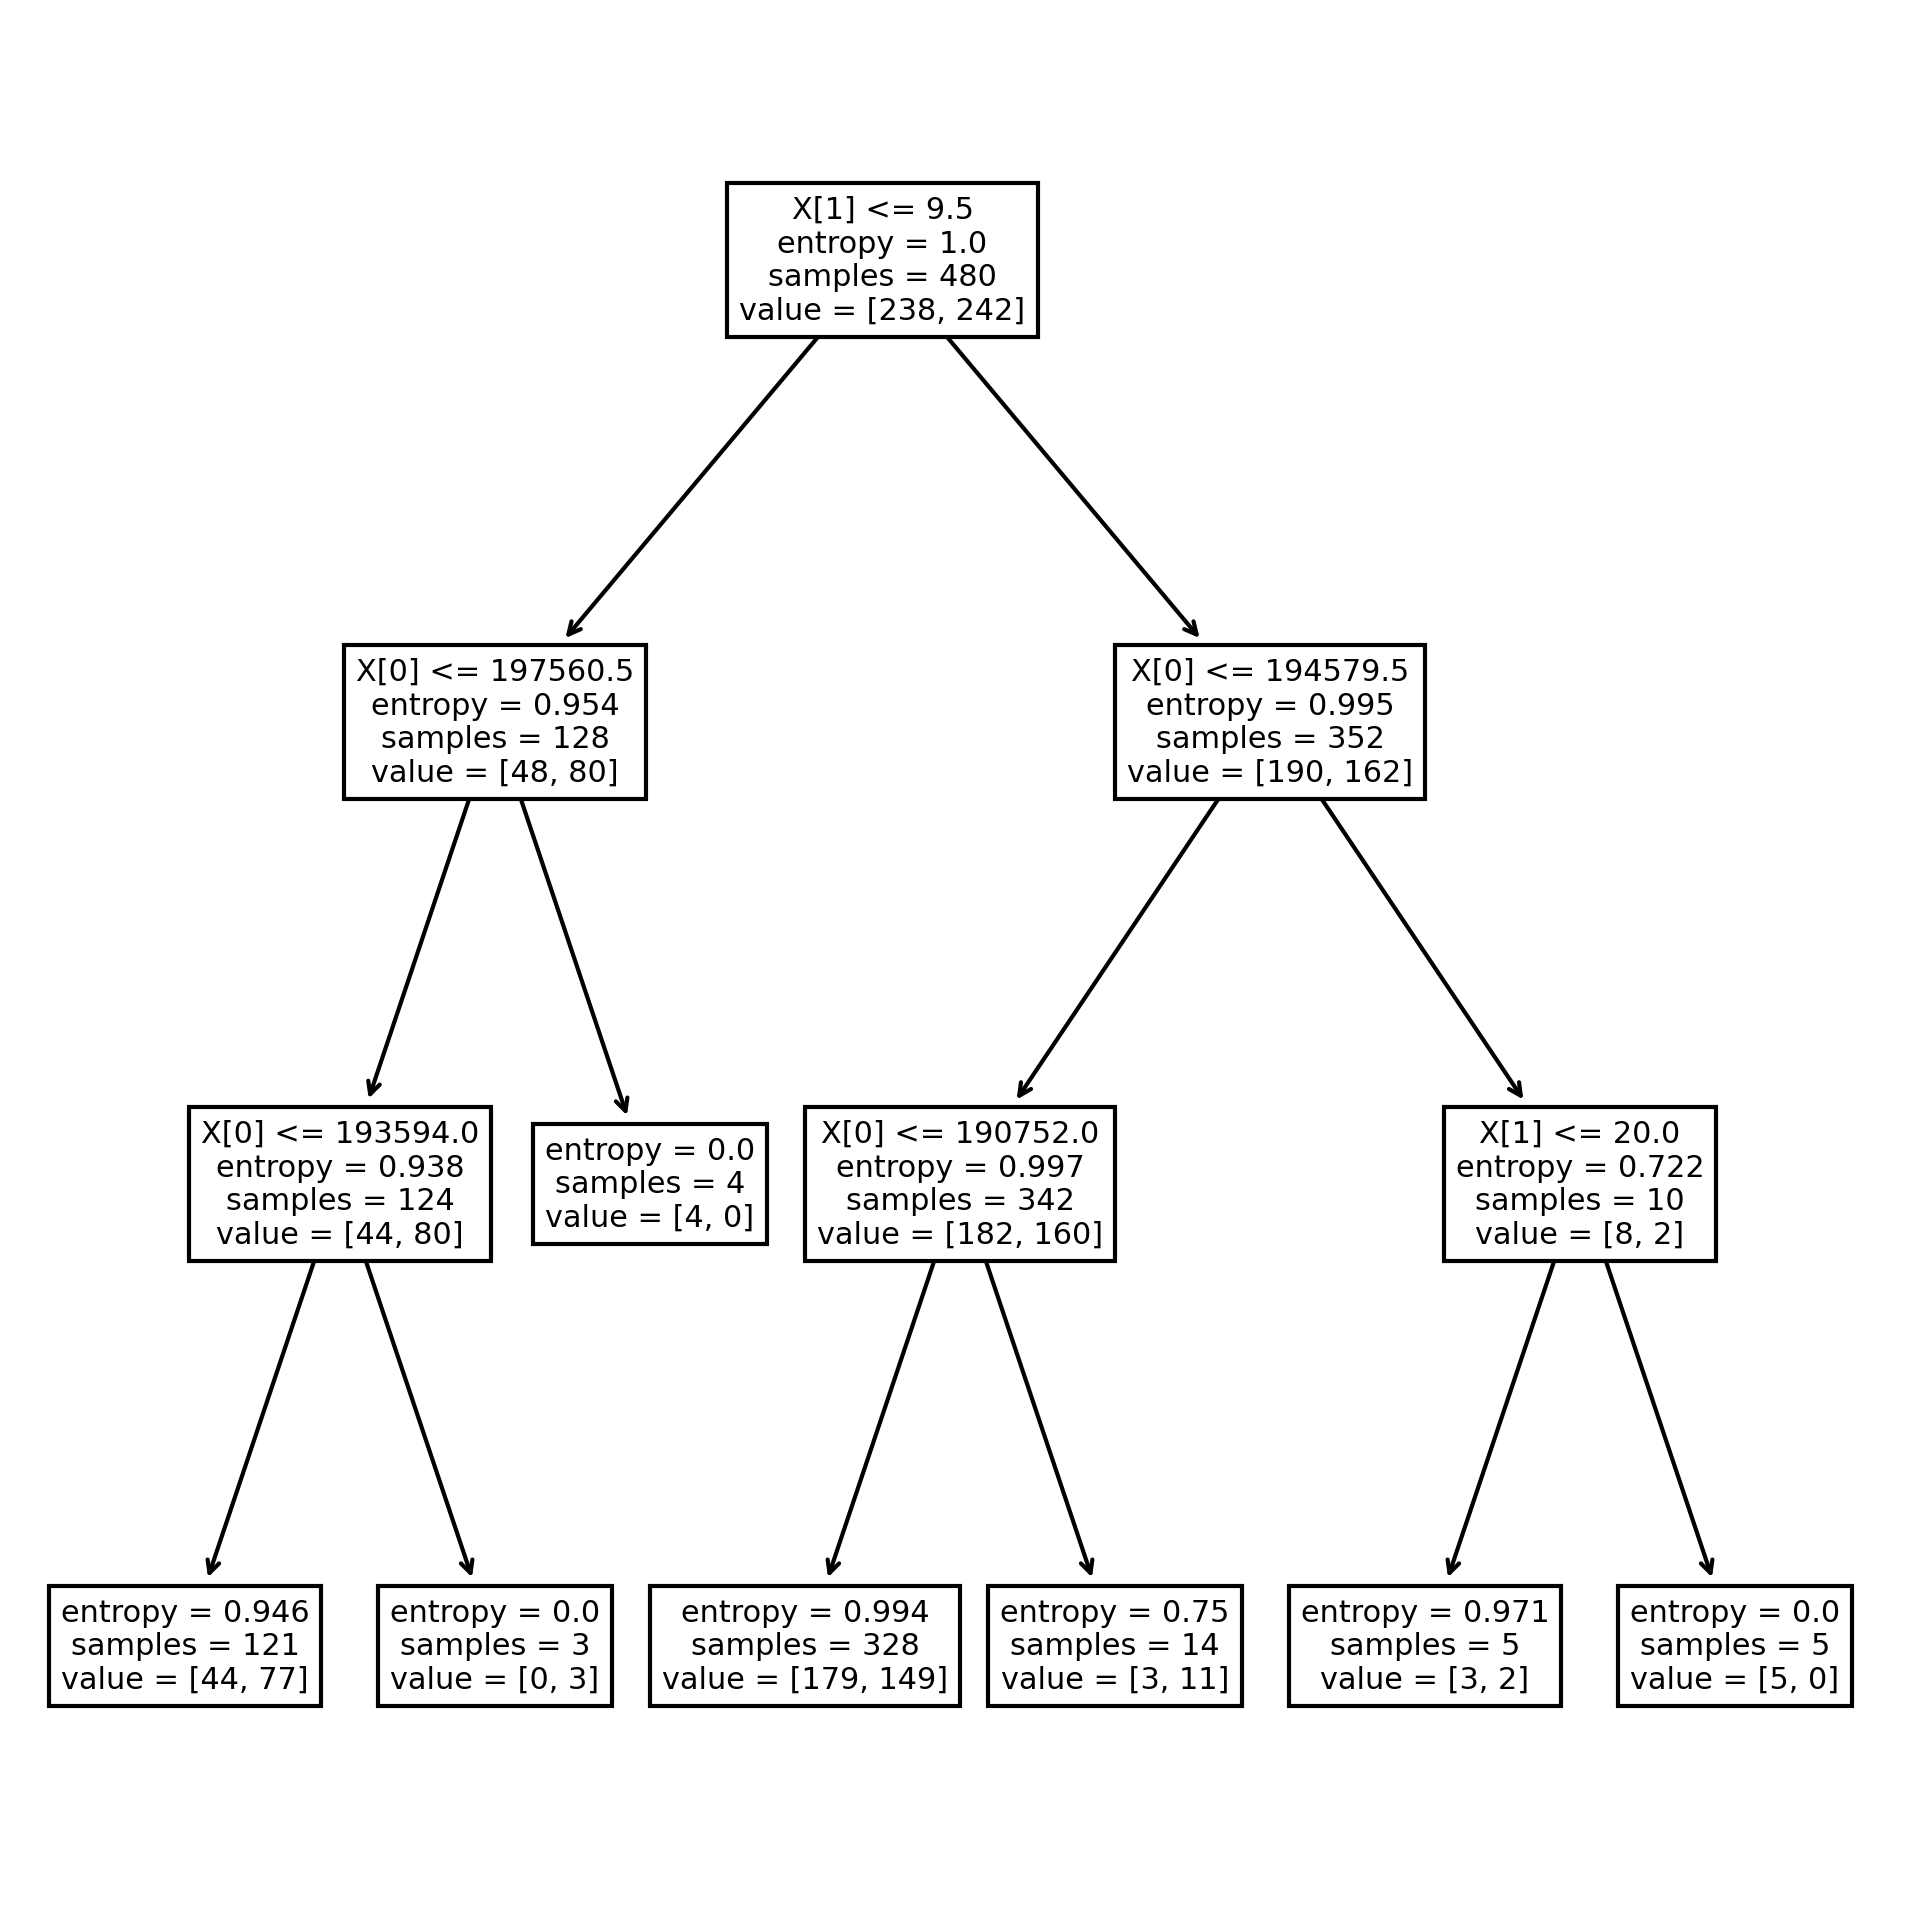

In [74]:
tree.plot_tree(model)
plt.show()

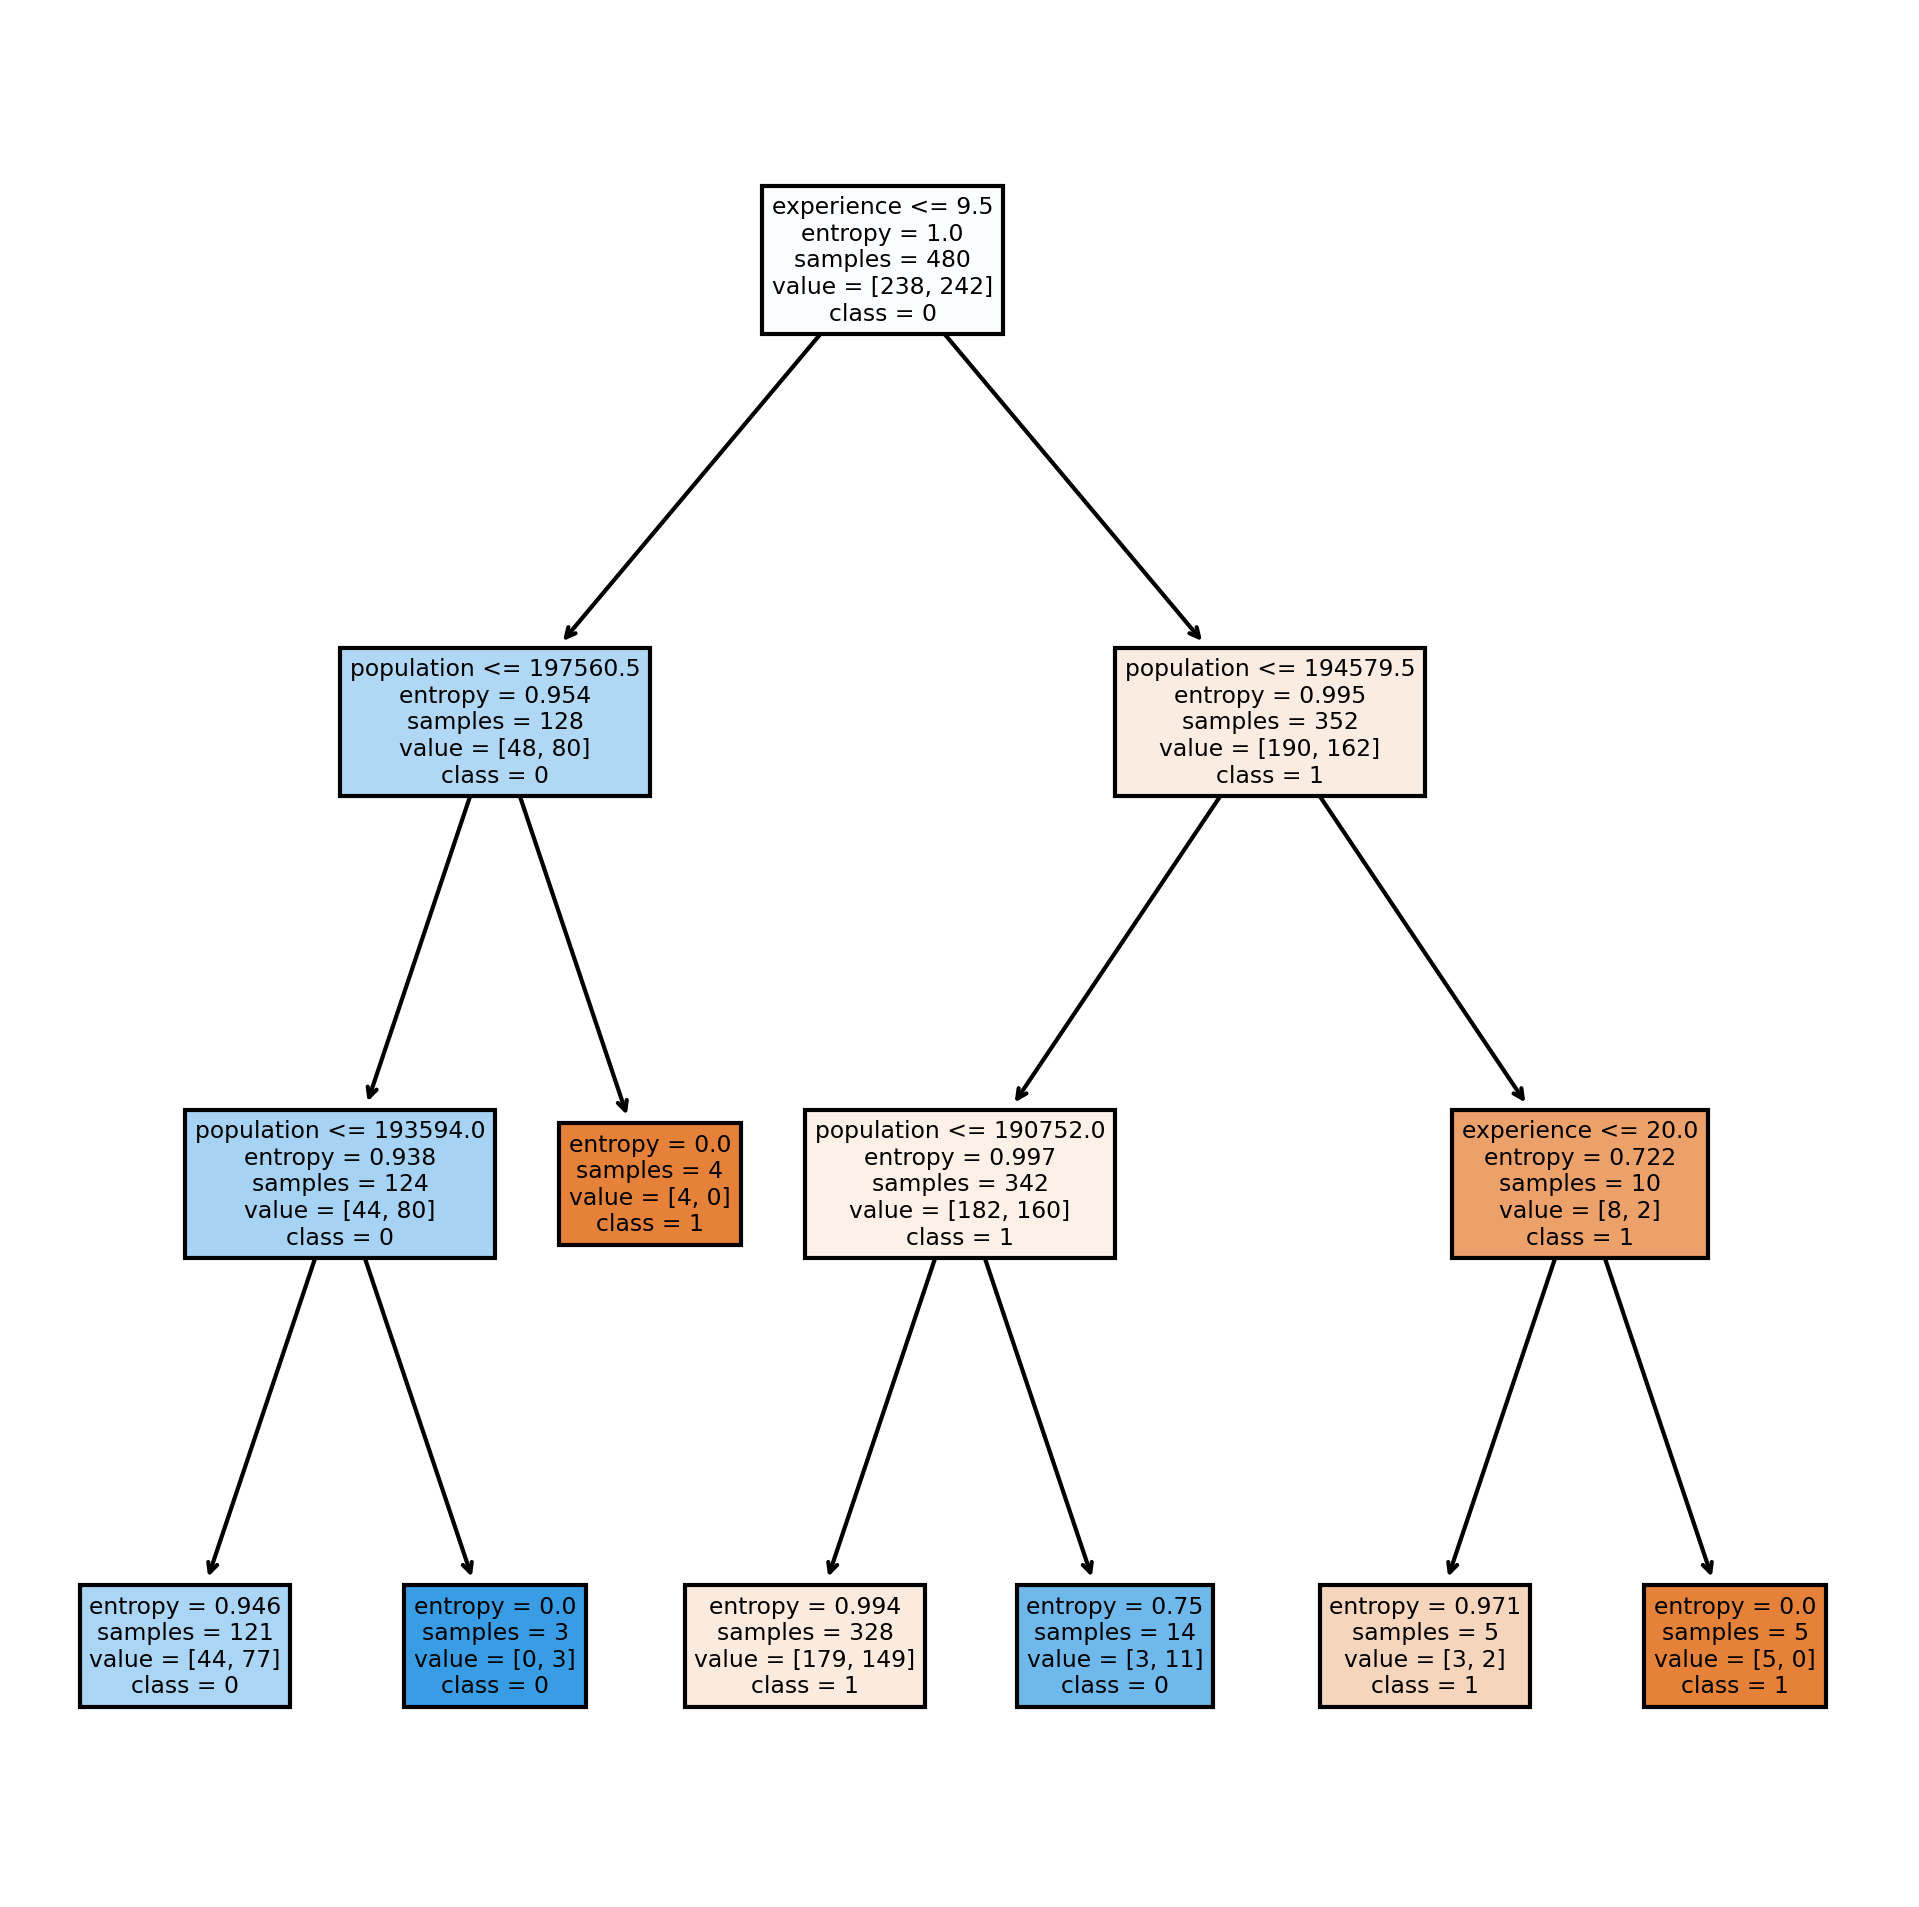

In [75]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

Prediction on test data:-

In [76]:
preds = model.predict(x_test)  
pd.Series(preds).value_counts()

0    84
1    36
dtype: int64

In [77]:
preds

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [78]:
pd.crosstab(y_test,preds)

col_0,0,1
Urban_YES,,
0,40,20
1,44,16


getting the two way table to understand the correct and wrong predictions.

In [79]:
np.mean(preds==y_test)

0.4666666666666667

Building Decision Tree Classifier (CART) using Gini Criteria:-

In [80]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [81]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

Prediction and the accuracy:-

In [82]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.4666666666666667

Decision Tree Regression:-

In [83]:
array = fraud_data.values
X = array[:,0:3]
y = array[:,3]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [85]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

Finding/ Output of the Accuracy:-

In [86]:
model.score(X_test,y_test)

-0.9393656716417913